In [310]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import stats

(334, 455)

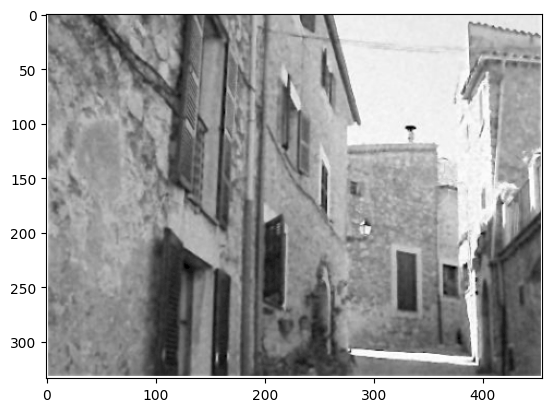

In [311]:
img = cv2.imread("data/NoisyTown.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = "gray")
img = img/255
img.shape

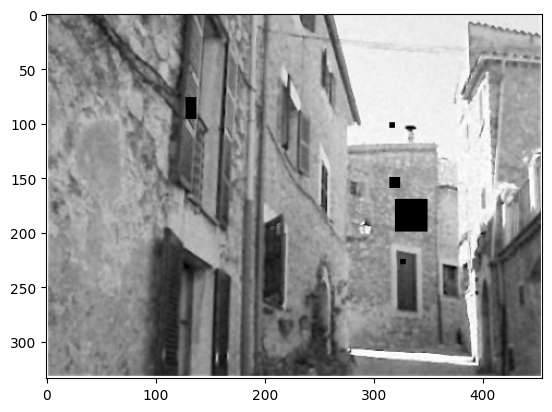

In [312]:
nPatches = 0
patches = []
showPatch = img.copy()
#showPatch[0 + y: 8 + y, 0 + x: 8 + x] = 0
#patches.append(img[0 + y: 8 + y, 0 + x: 8 + x].copy())
#Piece of sky
x, y = 325, 225
showPatch[0 + y: 5 + y, 0 + x: 5 + x] = 0
patches.append(img[0 + y: 5 + y, 0 + x: 5 + x].copy())
x, y = 315, 100
showPatch[0 + y: 5 + y, 0 + x: 5 + x] = 0
patches.append(img[0 + y: 5 + y, 0 + x: 5 + x].copy())
x, y = 315, 150
showPatch[0 + y: 10 + y, 0 + x: 10 + x] = 0
patches.append(img[0 + y: 10 + y, 0 + x: 10 + x].copy())
x, y = 128, 77
showPatch[0 + y: 20 + y, 0 + x: 10 + x] = 0
patches.append(img[0 + y: 20 + y, 0 + x: 10 + x].copy())
x, y = 320, 170
showPatch[0 + y: 30 + y, 0 + x: 30 + x] = 0
patches.append(img[0 + y: 30 + y, 0 + x: 30 + x].copy())
plt.imshow(showPatch, cmap = 'gray')

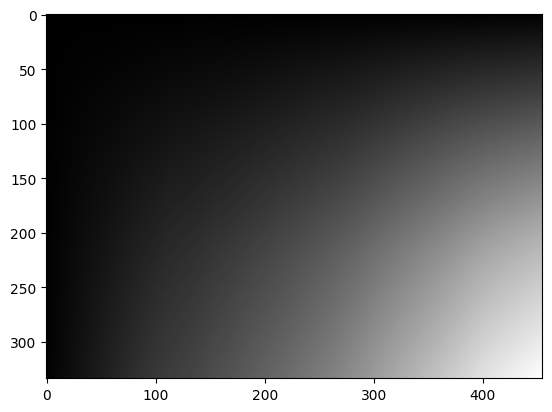

In [313]:
iImg = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        s = img[i, j]
        if i: s += iImg[i - 1][j]
        if j: s += iImg[i][j - 1]
        if j and i: s -= iImg[i - 1, j - 1]
        iImg[i, j] = s
plt.imshow(iImg, cmap = "gray")

In [314]:
pImg = np.copy(img)
for p in patches:
    s = np.sum(p)
    threshold = np.average(p) / 100
    for i in range(iImg.shape[0] - p.shape[0]):
        for j in range(iImg.shape[1] - p.shape[1]):
            sU = iImg[i + p.shape[0], j + p.shape[1]]
            if i: sU -= iImg[i - 1, j + p.shape[1]]
            if j: sU -= iImg[i + p.shape[0], j - 1]
            if i and j: sU += iImg[i - 1, j - 1]
            if np.abs(sU - s) < threshold:
                """
                r = stats.pearsonr(p.flatten(), img[i: i + p.shape[0], j: j + p.shape[1]].flatten())
                if np.abs(r.statistic) > 0.45:
                    print("yei")
                    pImg[i: i + p.shape[0], j: j + p.shape[1]] = p
                    
                """
                cP = p - img[i: i + p.shape[0], j: j + p.shape[1]]
                if np.average(cP) < 0.25:
                    nPatches += 1
                    pImg[i: i + p.shape[0], j: j + p.shape[1]] = p
                    #pImg[i: i + p.shape[0], j: j + p.shape[1]] = 0
    print(nPatches)

10
10
25
35
45


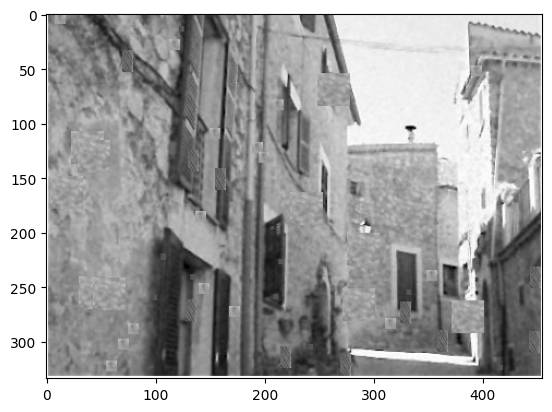

In [315]:
plt.imshow(pImg, cmap = 'gray')